В этом блокноте мы научимся выполнять сглаживание и строить тренд временного ряда.

Для начала загрузим данные уже привычным нам образом

**Используйте файл с данными из своего варианта задания!!!**

In [27]:
link = "/home/kit/PycharmProjects/MathLabs/digital_culture/task5_447502.csv"

In [28]:
import pandas as pd
import numpy as np

data_series = pd.read_csv(link)

In [29]:
data_series

,y
0,24
1,27
2,31
3,27
4,35
...,...
95,113
96,106
97,103
98,131


В задании нумерация начинается с $1$, а у нас — с $0$. Исправим это, выполнив сдвиг индексов

In [30]:
data_series.index += 1 
data_series

,y
1,24
2,27
3,31
4,27
5,35
...,...
96,113
97,106
98,103
99,131


Напишем функцию самостоятельно:

In [31]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for index in range(1, len(series)):
        result.append(alpha * series[index] + (1 - alpha) * result[index - 1]) 
    return result

Проведем сглаживание и запишем результат в столбец <code>y_exp_norm_user</code>

In [32]:
data_series['y_exp_norm_user'] = exponential_smoothing(data_series['y'].to_list(), 0.2)

In [33]:
data_series

,y,y_exp_norm_user
1,24,24.000000
2,27,24.600000
3,31,25.880000
4,27,26.104000
5,35,27.883200
...,...,...
96,113,110.804515
97,106,109.843612
98,103,108.474890
99,131,112.979912


Построим графики исходного и сглаженного рядов

In [34]:
import matplotlib.pyplot as plt

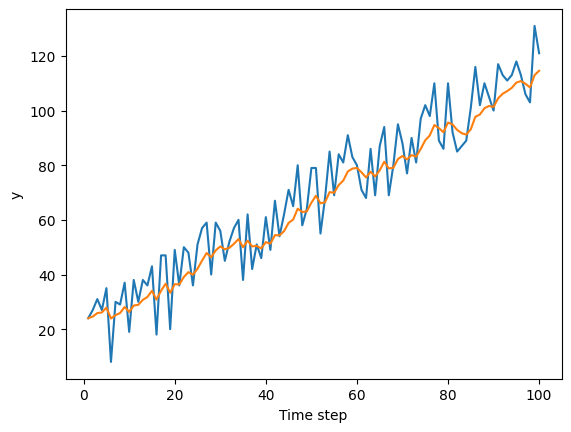

In [35]:
# plt.figure(figsize=(20, 8))
plt.plot('y', data = data_series)
plt.plot('y_exp_norm_user', data = data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Выведем 50-ую строку нашего набора данных

In [36]:
data_series.loc[[50]]

,y,y_exp_norm_user
50,79,66.279706


Выведем только 50-ое сглаженное значение

In [37]:
data_series['y_exp_norm_user'].loc[[50]]

50    66.279706
Name: y_exp_norm_user, dtype: float64

Округлим его до сотых

In [38]:
y50 = data_series['y_exp_norm_user'].loc[[50]]
round(y50, 2)

50    66.28
Name: y_exp_norm_user, dtype: float64

Теперь проведем экспоненциальное сглаживание нашего временного ряда, используя [функцию](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.ewm.html) <code>ewm</code>. Результат запишем в новый столбец <code>y_exp_norm</code>

In [55]:
data_series['y_exp_norm'] = data_series['y'].ewm(alpha=0.2, adjust=False).mean()

In [40]:
data_series

,y,y_exp_norm_user,y_exp_norm
1,24,24.000000,24.000000
2,27,24.600000,24.600000
3,31,25.880000,25.880000
4,27,26.104000,26.104000
5,35,27.883200,27.883200
...,...,...,...
96,113,110.804515,110.804515
97,106,109.843612,109.843612
98,103,108.474890,108.474890
99,131,112.979912,112.979912


In [41]:
print(round(max(abs(data_series['y_exp_norm'] - data_series['y_exp_norm_user'])),5))

0.0


Построим графики исходного и сглаженного рядов

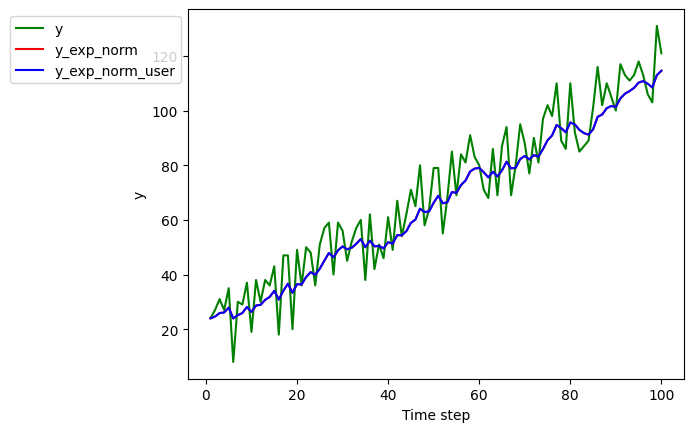

In [53]:
# plt.figure(figsize=(20, 8))
plt.plot('y', data = data_series, color = 'g', label = 'y')
plt.plot('y_exp_norm', data = data_series, color = 'r', label = 'y_exp_norm')
plt.plot('y_exp_norm_user', data = data_series,color = 'b', label = 'y_exp_norm_user')
plt.xlabel('Time step')
plt.ylabel('y')
plt.legend(bbox_to_anchor=(0,1))
plt.show()

Рассмотрим отдельно значения временного ряда и соответсвующие им временные метки. Преобразуем тип данных в массив <code>numpy</code>:

In [43]:
import numpy as np
X = data_series.index.to_numpy()
y = data_series['y'].to_numpy()
X

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [44]:
y

array([ 24,  27,  31,  27,  35,   8,  30,  29,  37,  19,  38,  30,  38,
        36,  43,  18,  47,  47,  20,  49,  36,  50,  48,  36,  51,  57,
        59,  40,  59,  56,  45,  52,  57,  60,  38,  62,  42,  51,  46,
        61,  49,  67,  54,  62,  71,  65,  80,  58,  64,  79,  79,  55,
        68,  85,  69,  84,  81,  91,  83,  80,  71,  68,  86,  69,  87,
        94,  69,  80,  95,  88,  77,  90,  81,  97, 102,  98, 110,  89,
        86, 110,  92,  85,  87,  89, 101, 116, 102, 110, 105, 100, 117,
       113, 111, 113, 118, 113, 106, 103, 131, 121])

Найдем уравнение линейного тренда, используя функцию <code>polyfit</code>

In [45]:
poly = np.polyfit(X, y, 1)
print(poly)

[ 0.94334833 21.79090909]


In [57]:
a = poly[0]
b = poly[1]
print(a, b)

0.9433483348334837 21.790909090909103


Найдем значения ряда, используя уравнение тренда

In [47]:
x = np.arange(1, 101)
data_series['lin_trend'] = a * x + b
data_series

,y,y_exp_norm_user,y_exp_norm,lin_trend
1,24,24.000000,24.000000,22.734257
2,27,24.600000,24.600000,23.677606
3,31,25.880000,25.880000,24.620954
4,27,26.104000,26.104000,25.564302
5,35,27.883200,27.883200,26.507651
...,...,...,...,...
96,113,110.804515,110.804515,112.352349
97,106,109.843612,109.843612,113.295698
98,103,108.474890,108.474890,114.239046
99,131,112.979912,112.979912,115.182394


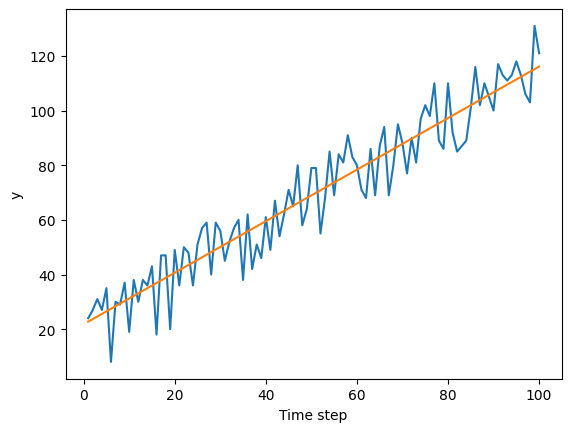

In [56]:
# plt.figure(figsize=(20, 8))
plt.plot('y', data=data_series)
plt.plot('lin_trend', data=data_series)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()

Вычислим коэффициент [детерминации](http://statistica.ru/theory/koeffitsient-determinatsii-i-lineynaya-regressiya/)

$R^{2}=1-\frac{\sum\limits_{i=1}^{n}\left(y_{i}-f_{i}\right)^{2}}{\sum\limits_{i=1}^{n}\left(y_{i}-y_{\mathrm{avg}}\right)^{2}}$

In [49]:
f_i = data_series['lin_trend']
y_avg = data_series['y'].mean()

In [50]:
R2 = 1 - ((y - f_i) ** 2).sum() / ((y - y_avg) ** 2).sum()

In [51]:
round(R2, 3)

0.902

Спрогнозируем $101$-ый член ряда

In [58]:
y_101 = a * 101 + b
round(y_101, 0)

117.0

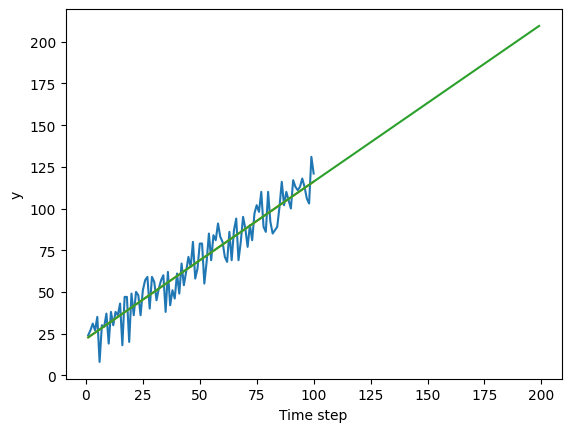

In [60]:
x = np.arange(1, 200)
forecast = a * x + b

plt.plot('y', data=data_series)
plt.plot('lin_trend', data=data_series)
plt.plot(x, forecast)
plt.xlabel('Time step')
plt.ylabel('y')
plt.show()